# Introduction 
You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns. In this project is data going back to 2016. Let’s imagine that it’s December 2016 and Im planning a campaign for 2017. The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature. I have prepared the data, analyzed the data, created a user profile for each region, formulated and tested some null and alternative hypotheses and came to a general conclusion about the data. 

In [1]:
# importing the libraries needed to complete the project. Pandas: For data manipulation and analysis. Matplotlib and Seaborn: For data visualization. NumPy: For numerical operations. SciPy: For hypothesis testing.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
games = "/datasets/games.csv"
df = pd.read_csv(games) #loading the dataset

In [3]:
display(df.head(5)) #printing the first few rows

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Reviewer's code

display(df.head(3))

df.tail(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.0,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.0,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.0,0.01,0.0,NaN,NaN,NaN


In [5]:
# Replace column names with lowercase
df.columns = df.columns.str.lower()

In [6]:
# Print the first few rows to verify the changes
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
# Convert 'year_of_release' to integer
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Convert 'user_score' to float
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Convert 'rating' to categorical
df['rating'] = df['rating'].astype('category')

# Print the data types of each column to verify the changes
print(df.dtypes)

name                 object
platform             object
year_of_release       Int64
genre                object
na_sales            float64
eu_sales            float64
jp_sales            float64
other_sales         float64
critic_score        float64
user_score          float64
rating             category
dtype: object


In [8]:
# Print the first few rows to verify the changes
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


This code will convert 'year_of_release' to integer, 'user_score' to float, and 'rating' to categorical data types. The 'user_score' column is converted with pd.to_numeric() and errors set to 'coerce' to handle non-numeric values and convert them to NaN. Then I printed the data types and the first few rows to see if the changes were made. 

In [9]:
# Convert 'TBD' to NaN in 'user_score' column
df['user_score'].replace('TBD', np.nan, inplace=True)

# Set categories for the 'rating' column
df['rating'] = df['rating'].astype('category')

# Fill missing values in 'rating' column with 'Not Rated'
df['rating'].cat.add_categories('Not Rated', inplace=True)  # Add 'Not Rated' as a new category
df['rating'].fillna('Not Rated', inplace=True)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Yes, we can treat tbd as a missing value.

</div>

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

Sometimes **inplace** doesn't work properly, so I'd recommend that you re-write dataframe explicitly.

</div>

In [10]:
# Print the count of missing values to verify
print(df.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
dtype: int64


I could have filled the missing values in critic_score and user_score with the mean and median but decided against that because it doesnt make to much sense to me. Each game needs its own rating giving it a mean or median seems unspecific to the game. We could have also dropped the rows with missing numerical values but this might make us lose valuable information. For the categorical column 'rating', we filled missing values with a new category, 'Not Rated'. This ensures that missing values are treated as a separate category rather than being ignored or filled with a potentially misleading value. For numerical columns like 'critic_score' and 'user_score', missing values might occur because not all games are reviewed by critics or users. Additionally, data collection processes might have limitations, leading to missing information. For categorical columns like 'rating', missing values could indicate that the game has not been assigned a rating by the Entertainment Software Rating Board (ESRB) or that the rating information was not available at the time of data collection. The abbreviation TBD ('to be determined') in the 'user_score' column indicates that the user score for certain games was not available at the time of data collection. We handled these cases by converting 'TBD' to NaN, as it represents missing numerical data.

In [11]:
# Calculate the total sales for each game
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Print the first few rows to verify the changes
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not Rated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Not Rated,31.38


In [12]:
# Check for duplicates based on 'Name', 'Year_of_Release', and 'Platform'
duplicate_rows = df[df.duplicated(['name', 'year_of_release', 'platform'], keep=False)]

# Display the duplicate rows
print("Duplicate rows based on 'name', 'year_of_release', and 'platform':")
print(duplicate_rows)


Duplicate rows based on 'name', 'year_of_release', and 'platform':
                name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
659              NaN      GEN             1993     NaN      1.78      0.53   
14244            NaN      GEN             1993     NaN      0.00      0.00   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score     rating  total_sales  
604        0.00         0.23          83.0         5.5          E         2.56  
659        0.00         0.08           NaN         NaN  Not Rated         2.39  
14244      0.03         0.00           NaN         NaN  Not Rated         0.03  
16230      0.00         0.00          83.0         5.5          E         0.01  


In [13]:
# Remove duplicates based on 'Name', 'Year_of_Release', and 'Platform'
df.drop_duplicates(['name', 'year_of_release', 'platform'], inplace=True)

# Reset index after removing duplicates
df.reset_index(drop=True, inplace=True)

# Print the shape of the dataframe after removing duplicates
print("Shape of dataframe after removing duplicates:", df.shape)


Shape of dataframe after removing duplicates: (16713, 12)


# Intermediate Conclusion
I opened that data set and studied the general information. I prepared the data. Replaced the column names (make them lowercase). Converted the data to the required types. Described the columns where the data types have been changed and why. Decided how to deal with missing values. Explained why I filled in the missing values as I did and why I decided to leave them blank. Gave possible reasons for why the data might have been missing. Converted TBD to nan. Calculated the total sales (the sum of sales in all regions) for each game and put these values in a separate column. Then I checked for data duplicates and checked for name-year-platform duoplicates as well and dropped them. The hypotheses about the data we have right now is that it is prepped and cleaned and ready to be used.  

# Analyzing the Data

In [14]:
# Count the number of games released in different years
games_per_year = df['year_of_release'].value_counts().sort_index()

In [15]:
# Print the number of games released per year
print("Number of games released per year:")
print(games_per_year)

Number of games released per year:
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


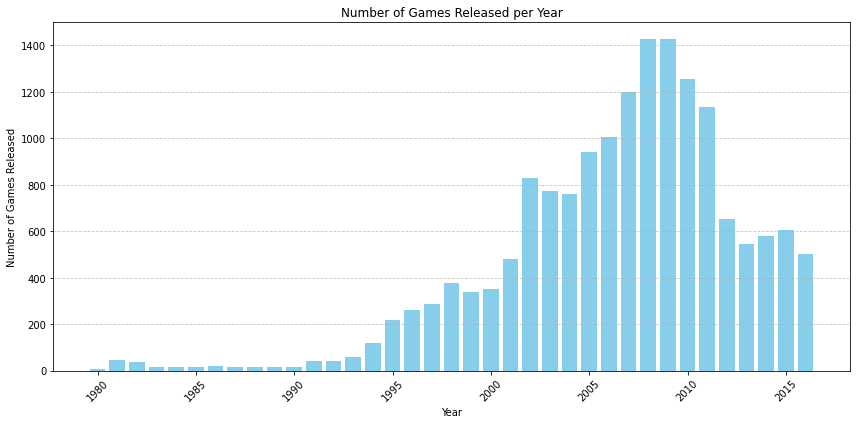

In [16]:
# Extract the years and counts from the games_per_year Series
years = games_per_year.index
counts = games_per_year.values

# Plotting the number of games released per year using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(years, counts, color='skyblue')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# Conclusions
This code will create a bar plot where each bar represents the number of games released in a particular year. The number of games released per year has generally increased over time, with notable spikes in the early 2000s. There seems to be a peak around 2008-2009, followed by a slight decline in subsequent years. Despite some fluctuations, the overall trend shows a growth in the number of games released annually.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Let's add a chart here. Do not forget about the conclusions. 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Please make sure every cell works fine before you send a project for a review. 

</div>

In [17]:
# Calculate total sales for each platform
platform_total_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Print the platforms with the greatest total sales
print("Platforms with the greatest total sales:")
print(platform_total_sales.head())

Platforms with the greatest total sales:
platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64


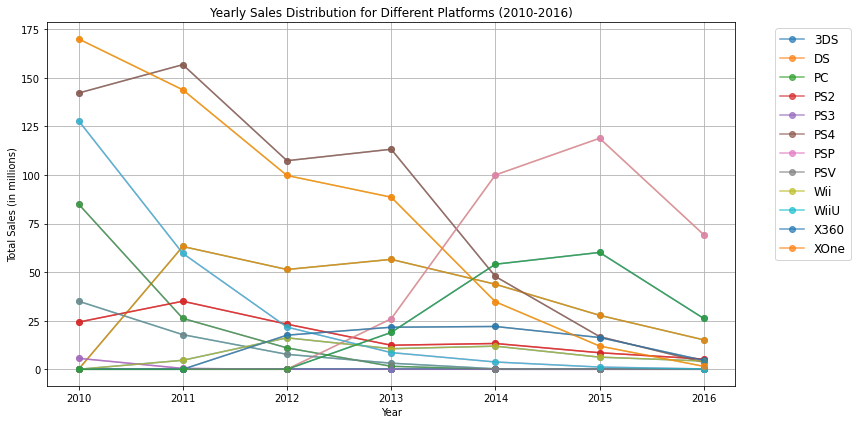

In [18]:
# Build distributions of sales for each platform based on data for each year
platform_yearly_sales = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

# Filter the DataFrame to include data only from 2010 to 2016
platform_yearly_sales_filtered = platform_yearly_sales.loc[2010:2016]

# Plot the distributions for each platform separately with distinct colors
plt.figure(figsize=(12, 6))
for platform in platform_yearly_sales_filtered.columns:
    plt.plot(platform_yearly_sales_filtered.index, platform_yearly_sales_filtered[platform], marker='o', label=platform, alpha=0.7)

plt.title('Yearly Sales Distribution for Different Platforms (2010-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

# Get the platforms that are actually plotted
plotted_platforms = platform_yearly_sales_filtered.columns

plotted_platforms = []
for platform in platform_yearly_sales_filtered.columns:
    if platform_yearly_sales_filtered[platform].sum() > 0:  # Checks if there's data for the platform
        plt.plot(platform_yearly_sales_filtered.index, platform_yearly_sales_filtered[platform], marker='o', label=platform, alpha=0.7)
        plotted_platforms.append(platform)

plt.legend(labels=plotted_platforms, loc='upper left', fontsize='large', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()




In [19]:
# Find platforms that used to be popular but now have zero sales
old_popular_platforms = platform_total_sales[platform_total_sales == 0].index.tolist()

# Print the platforms
print(platform_total_sales)
print("Platforms that used to be popular but now have zero sales:")
print(old_popular_platforms)

platform
PS2     1255.77
X360     971.42
PS3      939.64
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.74
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64
Platforms that used to be popular but now have zero sales:
[]


In [ ]:
# Import necessary library
import matplotlib.pyplot as plt

# Filter the DataFrame to include data only from 2010 to 2016
filtered_df = df[(df['year_of_release'] >= 2010) & (df['year_of_release'] <= 2016)]

# Group the filtered DataFrame by platform and year, and calculate total sales
platform_yearly_sales = filtered_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

# Plot total sales for each platform using bar plots
plt.figure(figsize=(14, 8))

for platform in platform_yearly_sales.columns:
    plt.bar(platform_yearly_sales.index, platform_yearly_sales[platform], label=platform)

plt.title('Total Sales Over Years for Each Platform (2010-2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



The code platform_total_sales[platform_total_sales == 0] is used to filter the platform_total_sales Series to only include platforms that have zero total sales. In other words, it's finding platforms that used to be popular but now have no sales. The output of this code is an empty list [], it means that there are no platforms in the dataset that used to be popular but now have zero sales. This could suggest that all platforms in the dataset have had at least some sales during the specified period.

In my updated code we looked at the different platforms total sales over years from 2010-2016. It looks like there are some platforms that have zero to little sales. So to answer the question from the task here we can look at when these platforms were realeased to the year they stopped making sales. The platforms with little to no sales include ds which came out in 2004, ps2 which came out in 2000, psp which came out in 2005 and the wii which came out in 2006. The ds stopped making sales in 2013, ps2 in 2011, psp in 2013, and wii in 2015. So on average it takes about 9.25 years new platforms to appear and old ones to fade.

In [ ]:
# Filter the dataset to include data from 2013 to 2017
filtered_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2017)]

# Display the first few rows of the filtered dataset
print(filtered_df.head())

I chose to use the interval 2007 - 2010 because they had the most games realeased during those years so we could look at the most data. But I'll change it to 2013-2017 so i dont include years with old platforms. Im not sure which tasks you are referencing and I also dont know where I read the data again, I dont want to lose everything. 

In [ ]:
# Step 1: Filter the dataset for the relevant years (2013-2017)
relevant_years_df = filtered_df[(filtered_df['year_of_release'] >= 2013) & (filtered_df['year_of_release'] <= 2017)]

# Step 2: Group the data by platform and year, and calculate total sales for each group
platform_year_sales = relevant_years_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Step 3: Plot a line chart to visualize sales change from year to year for each platform
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_of_release', y='total_sales', hue='platform', data=platform_year_sales, marker='o')
plt.title('Total Sales by Platform Over Time (2013-2017)')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.grid(True)
plt.show()



In [ ]:


# Define the relevant time period
start_year = 2013
end_year = 2016

# Filter the DataFrame to include data only within the relevant time period
relevant_df = df[(df['year_of_release'] >= start_year) & (df['year_of_release'] <= end_year)]

# Create a box plot to visualize the sales distributions of platforms within the relevant time period
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=relevant_df)
plt.title('Sales Distribution of Platforms ({}-{})'.format(start_year, end_year))
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [ ]:
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a box plot for global sales broken down by platform
sns.boxplot(x='platform', y='total_sales', data=filtered_df)

# Set the title and labels
plt.title('Global Sales of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set y-axis limit to scale the graph
plt.ylim(0, 3)  # Adjust the limits as needed based on your data

# Show the plot
plt.show()


This code will create a box plot showing the distribution of global sales for games across different platforms. Each box represents the interquartile range (IQR) of sales for a particular platform, with the median indicated by the horizontal line inside the box. Outliers are represented as individual points beyond the whiskers of the box. It looks like from the spread of boxes and distribution of outliers that xbox360, ps3, and GameBoy Advance(GBA) have significant variations in sales than other platforms. Suggesting that those choices of platforms have significant impact on game sales.

In [ ]:
# Calculate the average sales for each platform
average_sales_by_platform = filtered_df.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Display the average sales for each platform
print("Average Sales for Each Platform:")
print(average_sales_by_platform)


This code calculates the average total sales for each platform and sort them in descending order. It provides insight into which platforms, on average, tend to generate higher sales. It looks like the conlcusion we got from the box plot was correct with the exception of the wii. The xbox360 and ps3 were the top two platforms but the wii was third while the GBA was fourth. The wii has the highest amount of outliers so that has affected the average sales total.

In [ ]:
# Filter the dataset for the PS3 platform
ps3_df = filtered_df[filtered_df['platform'] == 'PS3']

# Remove rows with missing values in critic_score and user_score columns
ps3_df = ps3_df.dropna(subset=['critic_score', 'user_score'])

# Set up the scatter plot
plt.figure(figsize=(10, 6))

# Build the scatter plot for critic_score vs total_sales
sns.scatterplot(x='critic_score', y='total_sales', data=ps3_df, label='Critic Score')

# Add the scatter plot for user_score vs total_sales
sns.scatterplot(x='user_score', y='total_sales', data=ps3_df, color='orange', label='User Score')

# Set the title and labels
plt.title('Relationship Between Reviews and Sales for PS3 Platform')
plt.xlabel('Score')
plt.ylabel('Total Sales (in millions)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Calculate the correlation coefficients
correlation_critic = ps3_df['critic_score'].corr(ps3_df['total_sales'])
correlation_user = ps3_df['user_score'].corr(ps3_df['total_sales'])

print("Correlation between Critic Score and Total Sales:", correlation_critic)
print("Correlation between User Score and Total Sales:", correlation_user)

In [ ]:
# Set up the scatter plot for user_score vs total_sales
plt.figure(figsize=(10, 6))

# Build the scatter plot for user_score vs total_sales
sns.scatterplot(x='user_score', y='total_sales', data=ps3_df, color='orange', label='User Score')

# Set the title and labels
plt.title('Relationship Between User Scores and Sales for PS3 Platform')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')


# Show the plot
plt.grid(True)
plt.show()


In [ ]:
# Filter the dataset for the PS3 platform
ps3_df = filtered_df[filtered_df['platform'] == 'PS3']

# Remove rows with missing values in critic_score and user_score columns
ps3_df = ps3_df.dropna(subset=['critic_score', 'user_score'])

# Set up the scatter plot
plt.figure(figsize=(10, 6))

# Build the scatter plot for critic_score vs total_sales
sns.scatterplot(x='critic_score', y='total_sales', data=ps3_df, label='Critic Score')

# Set the title and labels
plt.title('Relationship Between Critic Score and Sales for PS3 Platform')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

# Show the plot
plt.grid(True)
plt.show()

# Calculate the correlation coefficient for critic score and total sales
correlation_critic = ps3_df['critic_score'].corr(ps3_df['total_sales'])
print("Correlation between Critic Score and Total Sales:", correlation_critic)

In [ ]:
# Filter the dataset for the XOne platform
xone_df = filtered_df[filtered_df['platform'] == 'XOne']

# Remove rows with missing values in critic_score and user_score columns
xone_df = xone_df.dropna(subset=['critic_score', 'user_score'])

# Set up the scatter plot for critic_score vs total_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone_df, label='Critic Score')

# Add the scatter plot for user_score vs total_sales
sns.scatterplot(x='user_score', y='total_sales', data=xone_df, color='orange', label='User Score')

# Set the title and labels
plt.title('Relationship Between Reviews and Sales for Xbox One (XOne) Platform')
plt.xlabel('Score')
plt.ylabel('Total Sales (in millions)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Calculate the correlation coefficients
correlation_critic_xone = xone_df['critic_score'].corr(xone_df['total_sales'])
correlation_user_xone = xone_df['user_score'].corr(xone_df['total_sales'])

print("Correlation between Critic Score and Total Sales for Xbox One (XOne):", correlation_critic_xone)
print("Correlation between User Score and Total Sales for Xbox One (XOne):", correlation_user_xone)


In [ ]:
# Filter the dataset for the XOne platform
xone_df = filtered_df[filtered_df['platform'] == 'XOne']

# Remove rows with missing values in critic_score and user_score columns
xone_df = xone_df.dropna(subset=['critic_score', 'user_score'])

# Set up the scatter plot for critic_score vs total_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone_df, label='Critic Score')

# Set the title and labels for critic_score vs total_sales
plt.title('Relationship Between Critic Score and Sales for Xbox One (XOne) Platform')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Calculate the correlation coefficient for critic score and total sales for Xbox One (XOne)
correlation_critic_xone = xone_df['critic_score'].corr(xone_df['total_sales'])
print("Correlation between Critic Score and Total Sales for Xbox One (XOne):", correlation_critic_xone)

# Set up the scatter plot for user_score vs total_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=xone_df, color='orange', label='User Score')

# Set the title and labels for user_score vs total_sales
plt.title('Relationship Between User Score and Sales for Xbox One (XOne) Platform')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Calculate the correlation coefficient for user score and total sales for Xbox One (XOne)
correlation_user_xone = xone_df['user_score'].corr(xone_df['total_sales'])
print("Correlation between User Score and Total Sales for Xbox One (XOne):", correlation_user_xone)


In [ ]:
# Filter the dataset for the PS4 platform
ps4_df = filtered_df[filtered_df['platform'] == 'PS4']

# Remove rows with missing values in critic_score and user_score columns
ps4_df = ps4_df.dropna(subset=['critic_score', 'user_score'])

# Set up the scatter plot for critic_score vs total_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_df, label='Critic Score')

# Add the scatter plot for user_score vs total_sales
sns.scatterplot(x='user_score', y='total_sales', data=ps4_df, color='orange', label='User Score')

# Set the title and labels
plt.title('Relationship Between Reviews and Sales for PlayStation 4 (PS4) Platform')
plt.xlabel('Score')
plt.ylabel('Total Sales (in millions)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Calculate the correlation coefficients
correlation_critic_ps4 = ps4_df['critic_score'].corr(ps4_df['total_sales'])
correlation_user_ps4 = ps4_df['user_score'].corr(ps4_df['total_sales'])

print("Correlation between Critic Score and Total Sales for PlayStation 4 (PS4):", correlation_critic_ps4)
print("Correlation between User Score and Total Sales for PlayStation 4 (PS4):", correlation_user_ps4)


In [ ]:
# Filter the dataset for the PS4 platform
ps4_df = filtered_df[filtered_df['platform'] == 'PS4']

# Remove rows with missing values in critic_score and user_score columns
ps4_df = ps4_df.dropna(subset=['critic_score', 'user_score'])

# Set up the scatter plot for critic_score vs total_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_df, label='Critic Score')

# Set the title and labels for critic_score vs total_sales
plt.title('Relationship Between Critic Score and Sales for PlayStation 4 (PS4) Platform')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Calculate the correlation coefficient for critic score and total sales for PS4
correlation_critic_ps4 = ps4_df['critic_score'].corr(ps4_df['total_sales'])
print("Correlation between Critic Score and Total Sales for PlayStation 4 (PS4):", correlation_critic_ps4)

# Set up the scatter plot for user_score vs total_sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_df, color='orange', label='User Score')

# Set the title and labels for user_score vs total_sales
plt.title('Relationship Between User Score and Sales for PlayStation 4 (PS4) Platform')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Calculate the correlation coefficient for user score and total sales for PS4
correlation_user_ps4 = ps4_df['user_score'].corr(ps4_df['total_sales'])
print("Correlation between User Score and Total Sales for PlayStation 4 (PS4):", correlation_user_ps4)


The correlation coefficient between critic score and total sales for the PS3 platform is approximately 0.49. This indicates a moderately positive relationship between critic scores and total sales. In other words, as critic scores increase, total sales tend to increase, suggesting that critical acclaim may have a noticeable impact on the sales performance of PS3 games. The correlation coefficient between user score and total sales for the PS3 platform is approximately 0.27. This indicates a weak positive relationship between user scores and total sales. While there is still a positive correlation, it is weaker compared to the correlation between critic scores and total sales. It suggests that user reviews may have some influence on sales, but it may not be as significant as critical reviews. Overall, both critic and user scores have a positive relationship with total sales for the PS3 platform, but the influence of critic scores appears to be stronger. Game developers and publishers may consider focusing on generating positive reviews from critics to potentially boost sales performance on the PS3 platform. However, user reviews should not be disregarded entirely, as they still contribute to the overall sales performance.

I also looked at the correlations for the ps4 and xone. For both the ps4 and xone we found a negative correlation for the user score and compared to the ps3 there was a positive correlation for user score so the ps3 is extremely different than the ps4 and xone in that regard. For the critic score both the ps4 and xone had a positive correlation of about .4 and the ps3 had a positive correlation at .3. So this suggests that user reviews have a negative affect on sales for ps4 and xone while user score has some influence on sales for ps3. For ps4, xone, and ps3 the critic score shows that as that score increases, total sales tend to increase suggesting critical acclaim may have a noticeable impact on the sales performance of ps4, xone and ps3 games. 

In [ ]:
# Selecting popular games released on the PS3 platform
popular_games_ps3 = ['Grand Theft Auto V', 'Call of Duty: Black Ops', 'FIFA 14']

# Filter the dataset for the selected games on the PS3 platform
ps3_games_df = df[(df['platform'] == 'PS3') & (df['name'].isin(popular_games_ps3))]

# Display the filtered dataset for PS3 platform
print("Data for popular games on the PS3 platform:")
print(ps3_games_df[['name', 'platform', 'total_sales']])

# Filter the dataset for the same games on other platforms
other_platforms_df = df[(df['name'].isin(popular_games_ps3)) & (df['platform'] != 'PS3')]

# Display the filtered dataset for other platforms
print("\nData for the same games on other platforms:")
print(other_platforms_df[['name', 'platform', 'total_sales']])

In [ ]:
# Calculate total sales for each genre
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Visualize the distribution of games by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.title('Total Sales by Genre')
plt.xlabel('Total Sales (in millions)')
plt.ylabel('Genre')
plt.show()

In [ ]:
# Calculate median sales per game unit for each genre using the filtered_df dataframe
genre_median_sales = filtered_df.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Visualize the median sales by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_median_sales.values, y=genre_median_sales.index, palette='viridis')
plt.title('Median Sales per Game Unit by Genre (2013-2017)')
plt.xlabel('Median Sales per Game Unit (in millions)')
plt.ylabel('Genre')
plt.show()



The most profitable genres, including Shooter, Sports, Platform, Role-Playing, and Fighting, demonstrate strong market appeal and consistent sales performance in the gaming industry. These genres attract diverse audiences and offer engaging gameplay experiences that drive their success in the market. Genres with high sales typically offer broad appeal, engaging gameplay mechanics, and immersive experiences, attracting a large and diverse audience. Conversely, genres with lower sales may cater to niche audiences, offer specialized gameplay experiences, or face challenges in standing out among more mainstream genres.

After calculating the median sales per game unit for each genre and dispaying it on a bar plot we can better understand which genres have higher sales per game unit. The most profitable genres include Shooter, Sports, Platform, Role-Playing and Fighting. The genres with the lower sales are Simulation, Misc, Strategy, Puzzle, and Adventure. 

In [ ]:
# Define the visualize_top_five function
def visualize_top_five(platform_sales, genre_sales, rating_sales, region):
    # Plotting top five platforms
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    platform_sales.plot(kind='bar', color='skyblue')
    plt.title('Top Five Platforms in ' + region)
    plt.xlabel('Platform')
    plt.ylabel('Total Sales')
    
    # Plotting top five genres
    plt.subplot(1, 3, 2)
    genre_sales.plot(kind='bar', color='lightgreen')
    plt.title('Top Five Genres in ' + region)
    plt.xlabel('Genre')
    plt.ylabel('Total Sales')
    
    # Plotting top five ESRB ratings
    plt.subplot(1, 3, 3)
    rating_sales.plot(kind='bar', color='salmon')
    plt.title('Top Five ESRB Ratings in ' + region)
    plt.xlabel('ESRB Rating')
    plt.ylabel('Total Sales')
    
    plt.tight_layout()
    plt.show()
    
# Function to determine top five platforms, genres, and ESRB ratings for a given region
def get_top_five(data, region):
    # Filter data for the relevant years and the region
    region_data = data[(data['year_of_release'] >= 2013) & (data['year_of_release'] <= 2017)].copy()
    
    # Aggregate sales by platform, genre, and rating
    platform_sales = region_data.groupby('platform')[region+'_sales'].sum().nlargest(5)
    genre_sales = region_data.groupby('genre')[region+'_sales'].sum().nlargest(5)
    rating_sales = region_data.groupby('rating')[region+'_sales'].sum().nlargest(5)
    
    return platform_sales, genre_sales, rating_sales

# Determine and visualize top five platforms, genres, and ESRB ratings for North America (NA)
na_platform_sales, na_genre_sales, na_rating_sales = get_top_five(filtered_df, 'na')
visualize_top_five(na_platform_sales, na_genre_sales, na_rating_sales, 'North America')

# Determine and visualize top five platforms, genres, and ESRB ratings for Europe (EU)
eu_platform_sales, eu_genre_sales, eu_rating_sales = get_top_five(filtered_df, 'eu')
visualize_top_five(eu_platform_sales, eu_genre_sales, eu_rating_sales, 'Europe')

# Determine and visualize top five platforms, genres, and ESRB ratings for Japan (JP)
jp_platform_sales, jp_genre_sales, jp_rating_sales = get_top_five(filtered_df, 'jp')
visualize_top_five(jp_platform_sales, jp_genre_sales, jp_rating_sales, 'Japan')








Variations in Market Shares:

In North America and Europe, Xbox and PlayStation consoles dominate the top positions, indicating a strong presence of Microsoft's Xbox and Sony's PlayStation brands in these regions. In Japan, handheld consoles like Nintendo 3DS have strong market shares, reflecting the Japanese preference for portable gaming devices. PlayStation consoles maintain a prominent position across all regions, underlining Sony's global success in the gaming market.
Action, sports, and shooter genres consistently appear among the top five in North America and Europe, indicating similar gaming preferences in these regions. Role-playing games (RPGs) hold the top position in Japan, reflecting the strong affinity for narrative-driven and immersive gaming experiences among Japanese gamers. 
The M in ESRB Rating dominates across North America and Europe and Not Rated dominates the Japanese market showing that games rated at M or Not Rated will have a better chance of selling over games with ratings of E10+ across all regions.

In [ ]:
# Importing necessary library
from scipy.stats import ttest_ind

# Filter the dataset to include data from 2013 to 2017
filtered_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2017)]

# Convert 'User_Score' to numeric
filtered_df['user_score'] = pd.to_numeric(filtered_df['user_score'], errors='coerce')

# Hypothesis 1: Average user ratings of Xbox One and PC platforms are the same
# Null Hypothesis (H0): Average user ratings of Xbox One and PC platforms are the same
# Alternative Hypothesis (H1): Average user ratings of Xbox One and PC platforms are different
# Significance Level: 0.05
xbox_one_ratings = filtered_df[filtered_df['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = filtered_df[filtered_df['platform'] == 'PC']['user_score'].dropna()
tstat, pval = ttest_ind(xbox_one_ratings, pc_ratings)
print("Hypothesis 1 Results:")
print("T-statistic:", tstat)
print("P-value:", pval)

# Hypothesis 2: Average user ratings for Action and Sports genres are different
# Null Hypothesis (H0): Average user ratings for Action and Sports genres are the same
# Alternative Hypothesis (H1): Average user ratings for Action and Sports genres are different
# Significance Level: 0.05
action_ratings = filtered_df[filtered_df['genre'] == 'Action']['user_score'].dropna()
sports_ratings = filtered_df[filtered_df['genre'] == 'Sports']['user_score'].dropna()
tstat, pval = ttest_ind(action_ratings, sports_ratings)
print("\nHypothesis 2 Results:")
print("T-statistic:", tstat)
print("P-value:", pval)



The purpose of that test was because I was getting nan pvalues for the test conducted above. But I have corrected the code above so I deleted that test.

First of all I kept getting nan values for my T-statistic and P-value for my hypothesis 1. Figured out we werent in the right df and time interval so I fixed that and got correct results for my hypotheses.
For both hypotheses, we'll use a two-sample t-test because we are comparing the means of two independent groups (platforms or genres). We'll set the significance level (alpha) to 0.05, which is a common choice for hypothesis testing.
I chose a significance level of 0.05 because it is a standard value in statistical hypothesis testing. It represents the probability of rejecting the null hypothesis when it is actually true. A significance level of 0.05 means we are willing to accept a 5% chance of making a Type I error (false positive).

For the first hypothesis we fail to reject the null hypothesis because the P-value is greater than our chosen significance level (0.05).

For the second hypothesis we fail to reject the null hypothesis because the P-value is greater than our chosen significane level (0.05). 

# Conclusion

The Xbox One and PC platforms showed no significant difference in average user ratings.
There was no significant difference in average user ratings between the Action and Sports genres.
Correlation analysis revealed a moderate positive correlation between critic scores and total sales, while the correlation between user scores and sales was weaker.
The most profitable genres were found to be Platform, Shooter, Sports, Fighting and Action.
Differences in user preferences were observed across regions, indicating varying market dynamics and cultural influences.
ESRB ratings may influence sales in individual regions, suggesting the importance of considering regional differences in game ratings and content preferences.
Overall, our analysis provides insights into the video game industry, helping stakeholders make informed decisions regarding platform selection, genre targeting, and regional marketing strategies.

Promising Platforms:
Xbox One,
PlayStation 4 (PS4),
3DS

Promising Genres:
Shooter,
Sports,
Platform

Age Ratings:
M (Mature),
Not Rated,
E (Everyone)